In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import torch
import torchvision
print("PyTorch version:", torch.__version__)
print("Torchvision version:", torchvision.__version__)
print("CUDA is available:", torch.cuda.is_available())
import sys


PyTorch version: 2.0.0
Torchvision version: 0.15.1
CUDA is available: True


In [2]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)
    polygons = []
    color = []
    for ann in sorted_anns:
        m = ann['segmentation']
        img = np.ones((m.shape[0], m.shape[1], 3))
        color_mask = np.random.random((1, 3)).tolist()[0]
        for i in range(3):
            img[:,:,i] = color_mask[i]
        ax.imshow(np.dstack((img, m*0.35)))

In [3]:
import sys
sys.path.append("..")
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

# sam_checkpoint = "/kaggle/input/segment-anything/pytorch/vit-b/1/model.pth"
# model_type = "vit_b"
sam_checkpoint = "/kaggle/input/segment-anything/pytorch/vit-h/1/model.pth"
model_type = "vit_h"

device = "cuda"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

# mask_generator = SamAutomaticMaskGenerator(sam)

mask_generator = SamAutomaticMaskGenerator(
    model=sam,
    points_per_side=10,
    pred_iou_thresh=0.9,
    stability_score_thresh=0.92,
    crop_n_layers=1,
    min_mask_region_area=100,  # Requires open-cv to run post-processing
)

No. of images =  3
0 /kaggle/input/sartorius-cell-instance-segmentation/test/7ae19de7bc2a.png
No. of detected cells =  51


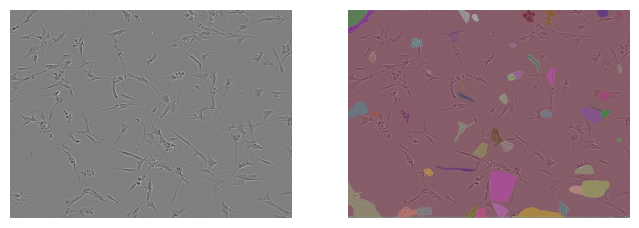

1 /kaggle/input/sartorius-cell-instance-segmentation/test/d8bfd1dafdc4.png
No. of detected cells =  54


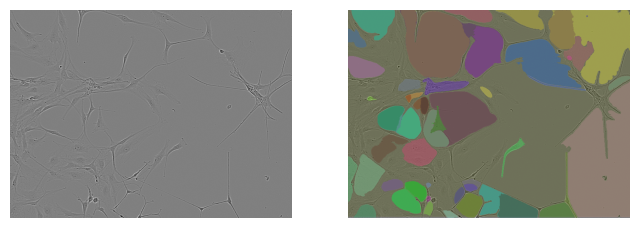

2 /kaggle/input/sartorius-cell-instance-segmentation/test/d48ec7815252.png
No. of detected cells =  16


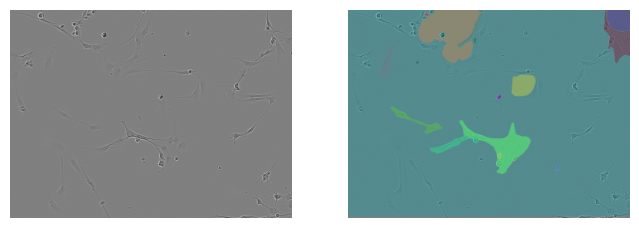

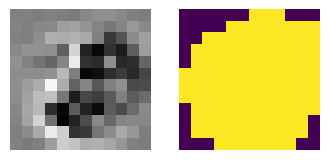

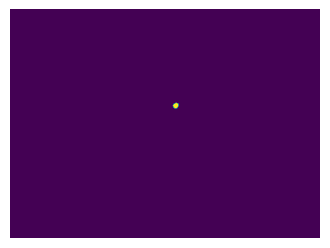

---
image no.  0
Area:  125
predicted_iou:  0.9558367729187012
stability_score:  0.9841269850730896
-----------------------------------------------------------------


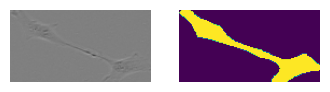

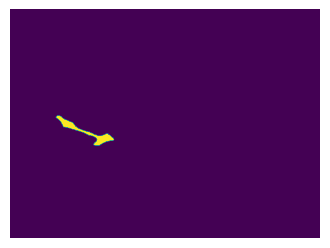

---
image no.  1
Area:  1579
predicted_iou:  0.9356844425201416
stability_score:  0.9422959089279175
-----------------------------------------------------------------


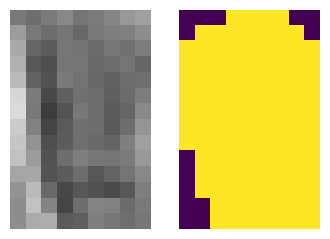

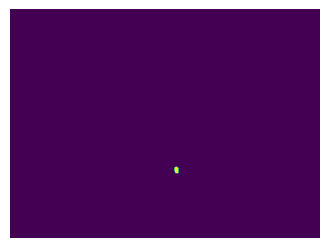

---
image no.  2
Area:  129
predicted_iou:  0.9083090424537659
stability_score:  0.9694656729698181
-----------------------------------------------------------------


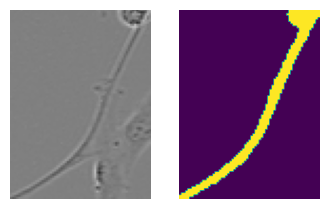

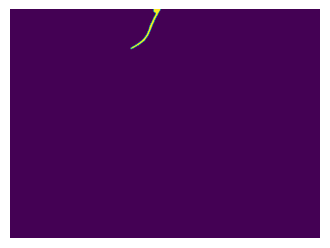

---
image no.  3
Area:  597
predicted_iou:  0.9254029989242554
stability_score:  0.9429967403411865
-----------------------------------------------------------------


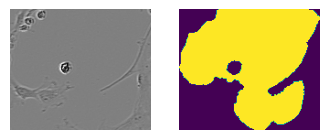

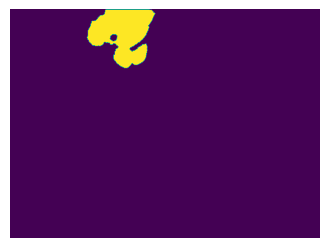

---
image no.  4
Area:  12832
predicted_iou:  0.917533814907074
stability_score:  0.9303185939788818
-----------------------------------------------------------------


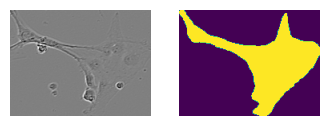

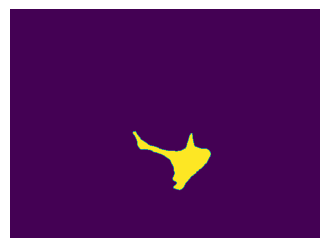

---
image no.  5
Area:  7116
predicted_iou:  0.9344914555549622
stability_score:  0.9438048005104065
-----------------------------------------------------------------


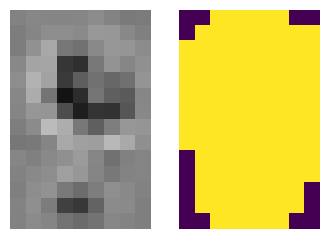

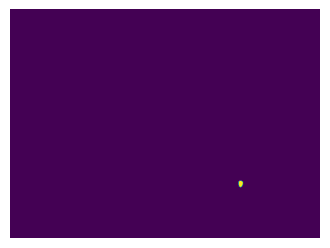

---
image no.  6
Area:  119
predicted_iou:  0.9331917762756348
stability_score:  0.9831932783126831
-----------------------------------------------------------------


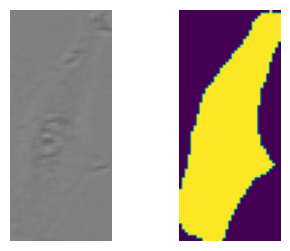

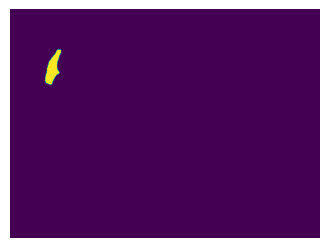

---
image no.  7
Area:  1504
predicted_iou:  0.9137782454490662
stability_score:  0.9526281356811523
-----------------------------------------------------------------


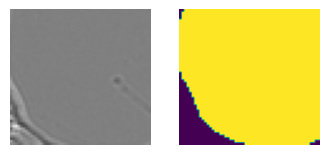

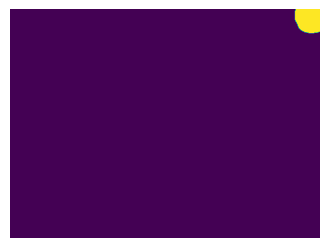

---
image no.  8
Area:  2822
predicted_iou:  0.9907085299491882
stability_score:  0.9604929089546204
-----------------------------------------------------------------


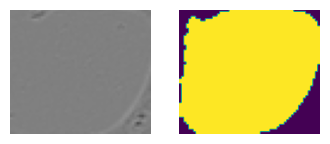

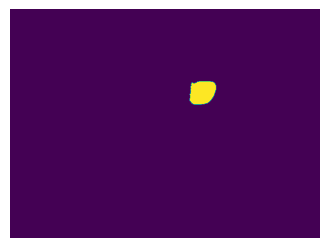

---
image no.  9
Area:  2663
predicted_iou:  0.9621091485023499
stability_score:  0.9285969138145447
-----------------------------------------------------------------


In [25]:
import glob
from PIL import Image, ImageOps
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2

patch_paths = glob.glob("/kaggle/input/sartorius-cell-instance-segmentation/test/*")
# patch_paths = glob("/kaggle/input/sartorius-cell-instance-segmentation/test/7ae19de7bc2a.png")
# patch_paths = glob("/kaggle/input/blood-cell-detection-dataset/images/*")
print("No. of images = ",len(patch_paths))

# for ii in range(len(patch_paths)):
for ii in range(3):
    #image = cv2.imread("/kaggle/input/sartorius-cell-instance-segmentation/test/7ae19de7bc2a.png")
    image = cv2.imread(patch_paths[ii])
    masks = mask_generator.generate(image)
    print(ii, patch_paths[ii])
    print("No. of detected cells = ", len(masks))
    plt.figure(figsize=(8,5))
    plt.subplot(121)
    plt.imshow(image)
    plt.axis('off')
    plt.subplot(122)
    plt.imshow(image)
    show_anns(masks)
    plt.axis('off')
    plt.show()     
#   for i in range(len(masks)):
for i in range(10):
    x=int(masks[i]['bbox'][0])
    y=int(masks[i]['bbox'][1])
    a=int(masks[i]['bbox'][2])
    b=int(masks[i]['bbox'][3])
    cropped_im = image[y:y+b, x:x+a, :]
    cropped_mask = masks[i]['segmentation'][y:y+b, x:x+a]
    plt.figure(figsize=(4,3))
    plt.subplot(121)
    plt.imshow(cropped_im)
    plt.axis('off')
    plt.subplot(122)
    plt.imshow(cropped_mask)
    plt.axis('off')
    plt.show() 
    plt.figure(figsize=(4,4))
    plt.imshow(masks[i]['segmentation'])
    plt.axis('off')
    plt.show() 
    print("---")
    print("image no. ", str(i))
    print("Area: ", masks[i]['area'])
    print("predicted_iou: ", masks[i]['predicted_iou'])
    print("stability_score: ", masks[i]['stability_score'])
    print("-----------------------------------------------------------------")